<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Import-libraries-and-load-the-data" data-toc-modified-id="Import-libraries-and-load-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries and load the data</a></span></li><li><span><a href="#Explore-the-Data" data-toc-modified-id="Explore-the-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Explore the Data</a></span></li><li><span><a href="#Visualizing-High-Dimensional-Features" data-toc-modified-id="Visualizing-High-Dimensional-Features-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualizing High Dimensional Features</a></span></li></ul></li></ul></div>

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is analyzing data sets to summarize their main characteristics such as mean, standard deviation, and count, so on, often with visual methods.

It’s often the first step in data analysis, implemented before any formal statistical techniques are applied.

This dataset is from kaggle. The business problem is to analyze customer personalities and expenses.

 ### Import libraries and load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn

from datetime import datetime, date, timedelta
from library.sb_utils import save_file
%matplotlib inline

sns.set_style('whitegrid') 
# plt.style.use('ggplot')

In [2]:
df = pd.read_csv('./Data/01_cleaned_data.csv')
df.head()

,Income,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Edu,Household,Age,Children,Age_group
0,58138.0,04-09-2012,58,635,88,546,172,88,88,3,...,0,0,0,0,1,Grad,single,65,0,60-70
1,46344.0,08-03-2014,38,11,1,6,2,1,6,2,...,0,0,0,0,0,Grad,single,68,2,60-70
2,71613.0,21-08-2013,26,426,49,127,111,21,42,1,...,0,0,0,0,0,Grad,couple,57,0,50-60
3,26646.0,10-02-2014,26,11,4,20,10,3,5,2,...,0,0,0,0,0,Grad,couple,38,1,30-40
4,58293.0,19-01-2014,94,173,43,118,46,27,15,5,...,0,0,0,0,0,Postgrad,couple,41,1,40-50


In [3]:
df.shape

(2152, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152 entries, 0 to 2151
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2152 non-null   float64
 1   Dt_Customer          2152 non-null   object 
 2   Recency              2152 non-null   int64  
 3   Wines                2152 non-null   int64  
 4   Fruits               2152 non-null   int64  
 5   Meat                 2152 non-null   int64  
 6   Fish                 2152 non-null   int64  
 7   Sweets               2152 non-null   int64  
 8   Gold                 2152 non-null   int64  
 9   NumDealsPurchases    2152 non-null   int64  
 10  NumWebPurchases      2152 non-null   int64  
 11  NumCatalogPurchases  2152 non-null   int64  
 12  NumStorePurchases    2152 non-null   int64  
 13  NumWebVisitsMonth    2152 non-null   int64  
 14  AcceptedCmp3         2152 non-null   int64  
 15  AcceptedCmp4         2152 non-null   i

### Explore the Data

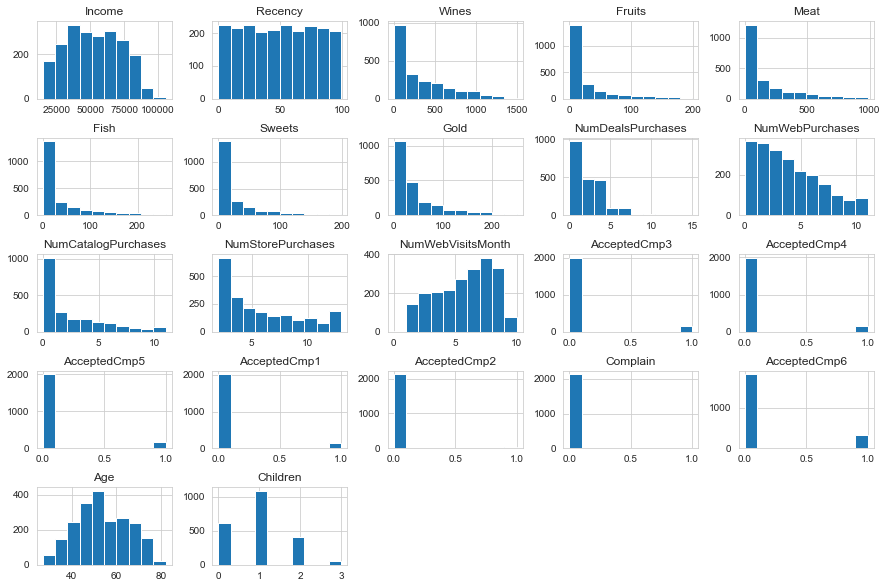

In [5]:
# Visualizing and retrieving the relational information between independent variables.
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5); # with an argument hspace=0.5 to adjust the spacing

In [6]:
# The number of days since the customers enrolled with the company**
df['Dt_Customer']= pd.to_datetime(df.Dt_Customer)  # to parse the values

df['Days_Enrolled'] = datetime.today() - df.Dt_Customer  # to get number of days the customers enrolled 

df['Month'] = df['Dt_Customer'].dt.month
df['Dt_Quarter1'] = df['Month'].map(lambda x: x in [1,2,3]).astype('int32')
df['Dt_Quarter2'] = df['Month'].map(lambda x: x in [4,5.6]).astype('int32')
df['Dt_Quarter3'] = df['Month'].map(lambda x: x in [7,8,9]).astype('int32')
df['Dt_Quarter4'] = df['Month'].map(lambda x: x in [10,11,12]).astype('int32')

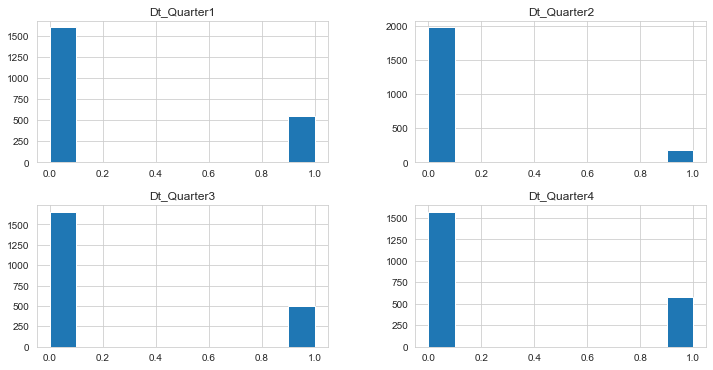

In [7]:
Quarters = ['Dt_Quarter1','Dt_Quarter2', 'Dt_Quarter3', 'Dt_Quarter4']
df[Quarters].hist(figsize=(12,6));

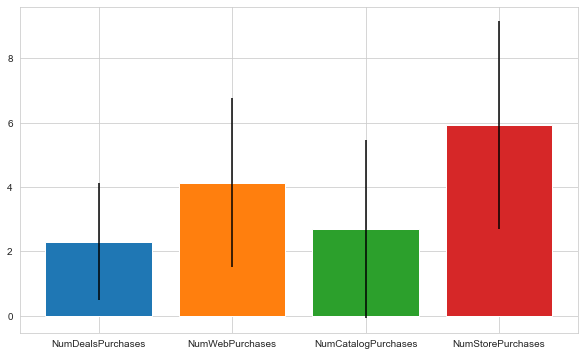

In [8]:
# number of purchases 
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar("NumDealsPurchases", df['NumDealsPurchases'].mean(), yerr=df['NumDealsPurchases'].std())
ax.bar("NumWebPurchases", df['NumWebPurchases'].mean(), yerr=df['NumWebPurchases'].std())
ax.bar("NumCatalogPurchases",df['NumCatalogPurchases'].mean(), yerr=df['NumCatalogPurchases'].std())
ax.bar("NumStorePurchases",df['NumStorePurchases'].mean(), yerr=df['NumStorePurchases'].std())
plt.show();

 **The effectiveness of the promotional campaign**

In [9]:
# six champaigns
cmp = ["1st","2nd","3rd","4th","5th","6th"]  
results = [df['AcceptedCmp1'].sum(),df['AcceptedCmp2'].sum(),df['AcceptedCmp3'].sum(),df['AcceptedCmp4'].sum(),df['AcceptedCmp5'].sum(),  df['AcceptedCmp6'].sum()]
perc = [round(x *100 /2078, 2) for x in results]

arr = np.array([cmp, results, perc]).T

df_cmp = pd.DataFrame(arr, columns=['cmp', 'results', 'accpt_rate'])
df_cmp.sort_values(by='results', ascending=True)
print(df_cmp)

   cmp results accpt_rate
0  1st     142       6.83
1  2nd      30       1.44
2  3rd     158        7.6
3  4th     164       7.89
4  5th     161       7.75
5  6th     328      15.78


fig, ax = plt.subplots()
ax.plot(df_cmp.cmp, df_cmp.results, color='blue')
ax2 = ax.twinx()
ax2.plot(df_cmp.cmp, df_cmp.accpt_rate, color='red')
import math

low = min(df_cmp.results)
high = max(df_cmp.results)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])

In [10]:
df_offers = pd.DataFrame(results, perc).reset_index()
df_offers.index = ["1st cmp","2nd cmp","3rd cmp","4th cmp","5th cmp","6th cmp"]
df_offers.columns = ['results', 'perc']
df_offers

,results,perc
1st cmp,6.83,142
2nd cmp,1.44,30
3rd cmp,7.60,158
4th cmp,7.89,164
5th cmp,7.75,161
6th cmp,15.78,328


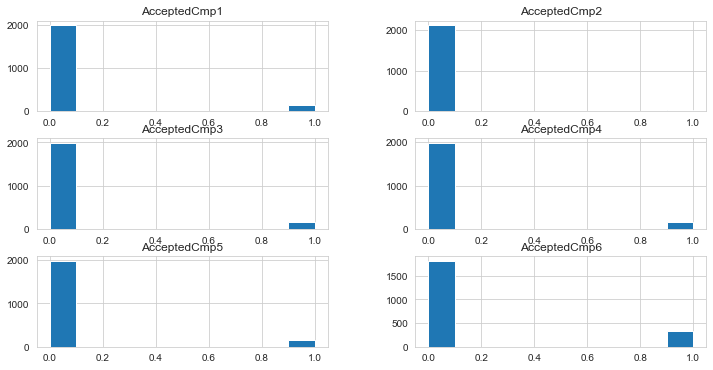

In [12]:
accepted = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']
df[accepted].hist(figsize=(12,6));

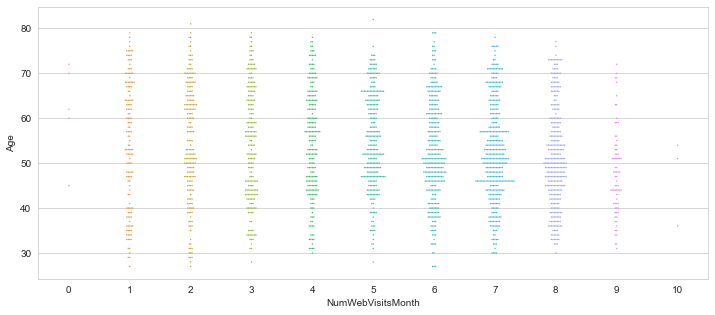

In [13]:
# 'NumWebVisitsMonth'
plt.subplots(figsize=(12, 5))
sns.swarmplot(y='Age', x='NumWebVisitsMonth', data=df, size=1.4);

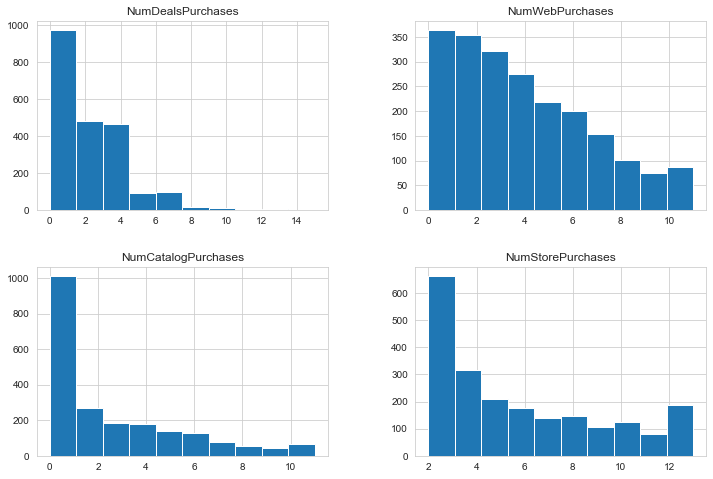

In [14]:
# Visaul EDA
features = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases']
df[features].hist(figsize=(12,8));

### Visualizing High Dimensional Features

In [17]:
To_Drop = ['Month']
df.drop(columns=To_Drop, axis=1, inplace=True)

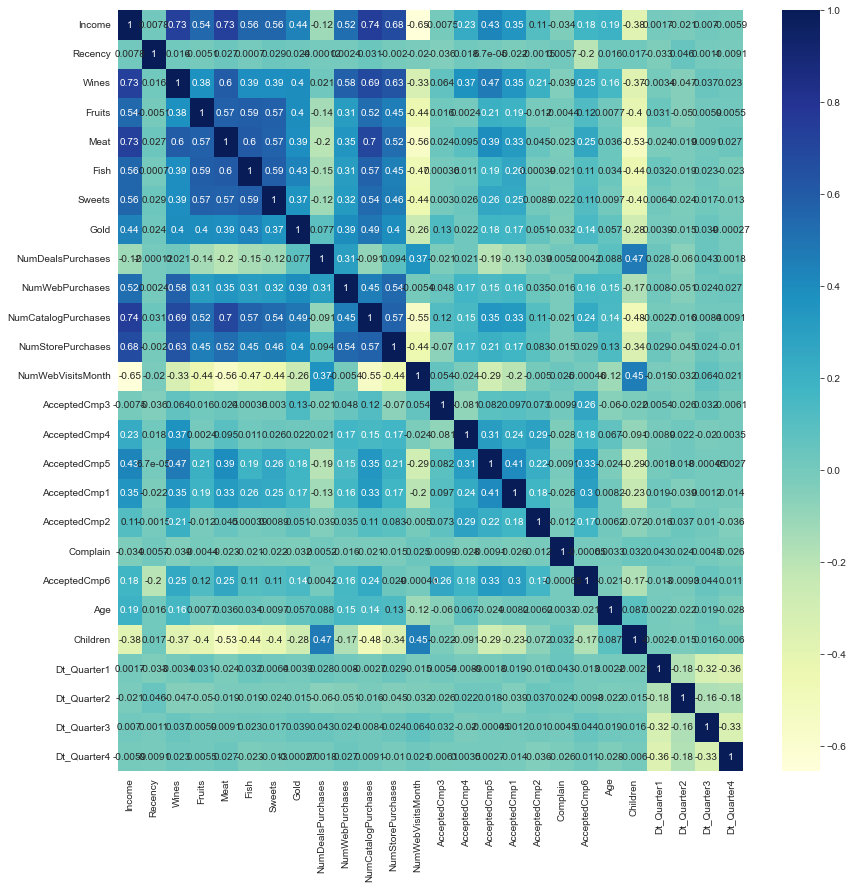

In [18]:
# Make a heatmap of the data checking correlation between features
corr = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True,cmap="YlGnBu");  # corr.style.background_gradient(cmap='viridis')

No two columns are too much correlated with each other so we can't drop any column on the basis of correlation

Checking for correlation by unstacking data;
It is used to calculate how one variable is correlated/ dependent on another variable.
Extreme values signify high correlation. Multicollinear variables with correlation more than a threshold are usually dropped from the dataset.

In [19]:
c = corr.abs().unstack().drop_duplicates().reset_index()
c = c.rename(columns={'level_0': 'feature 1', 'level_1': 'feature 2', 0: 'Correlation'})
c = c.query('.5 <= Correlation < 1').sort_values(by = 'Correlation', ascending = False).reset_index(drop=True)
c.style.background_gradient(cmap='Set1_r')

,feature 1,feature 2,Correlation
0,Income,NumCatalogPurchases,0.741942
1,Income,Wines,0.734956
2,Income,Meat,0.728767
3,Meat,NumCatalogPurchases,0.702633
4,Wines,NumCatalogPurchases,0.685150
5,Income,NumStorePurchases,0.681912
6,Income,NumWebVisitsMonth,0.654475
7,Wines,NumStorePurchases,0.632347
8,Meat,Fish,0.601129
9,Wines,Meat,0.597370


<font color='teal'> A couple of things:</font>
 - Pair_plotting the variables with themselves would be pointless, so the pairplot() method makes histograms to show the distributions of those variables' values. This allows us to quickly see the shape of each variable's values.
 - The plot for the 'AcceptedCmp6' variable forms horizontal bands, due to the fact that it's a discrete variable. I will be pursuing a logistic regression analysis of this variable.

In [ ]:
print(df.shape)

In [ ]:
# save the data to a new csv file
datapath = './Data'
save_file(df, '02_EDA.csv', datapath)